In [1]:
!pip install biopython

In [2]:
!pip install GEOparse

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
from pathlib import Path  
import GEOparse

# Workflow do Cumida UFRGS

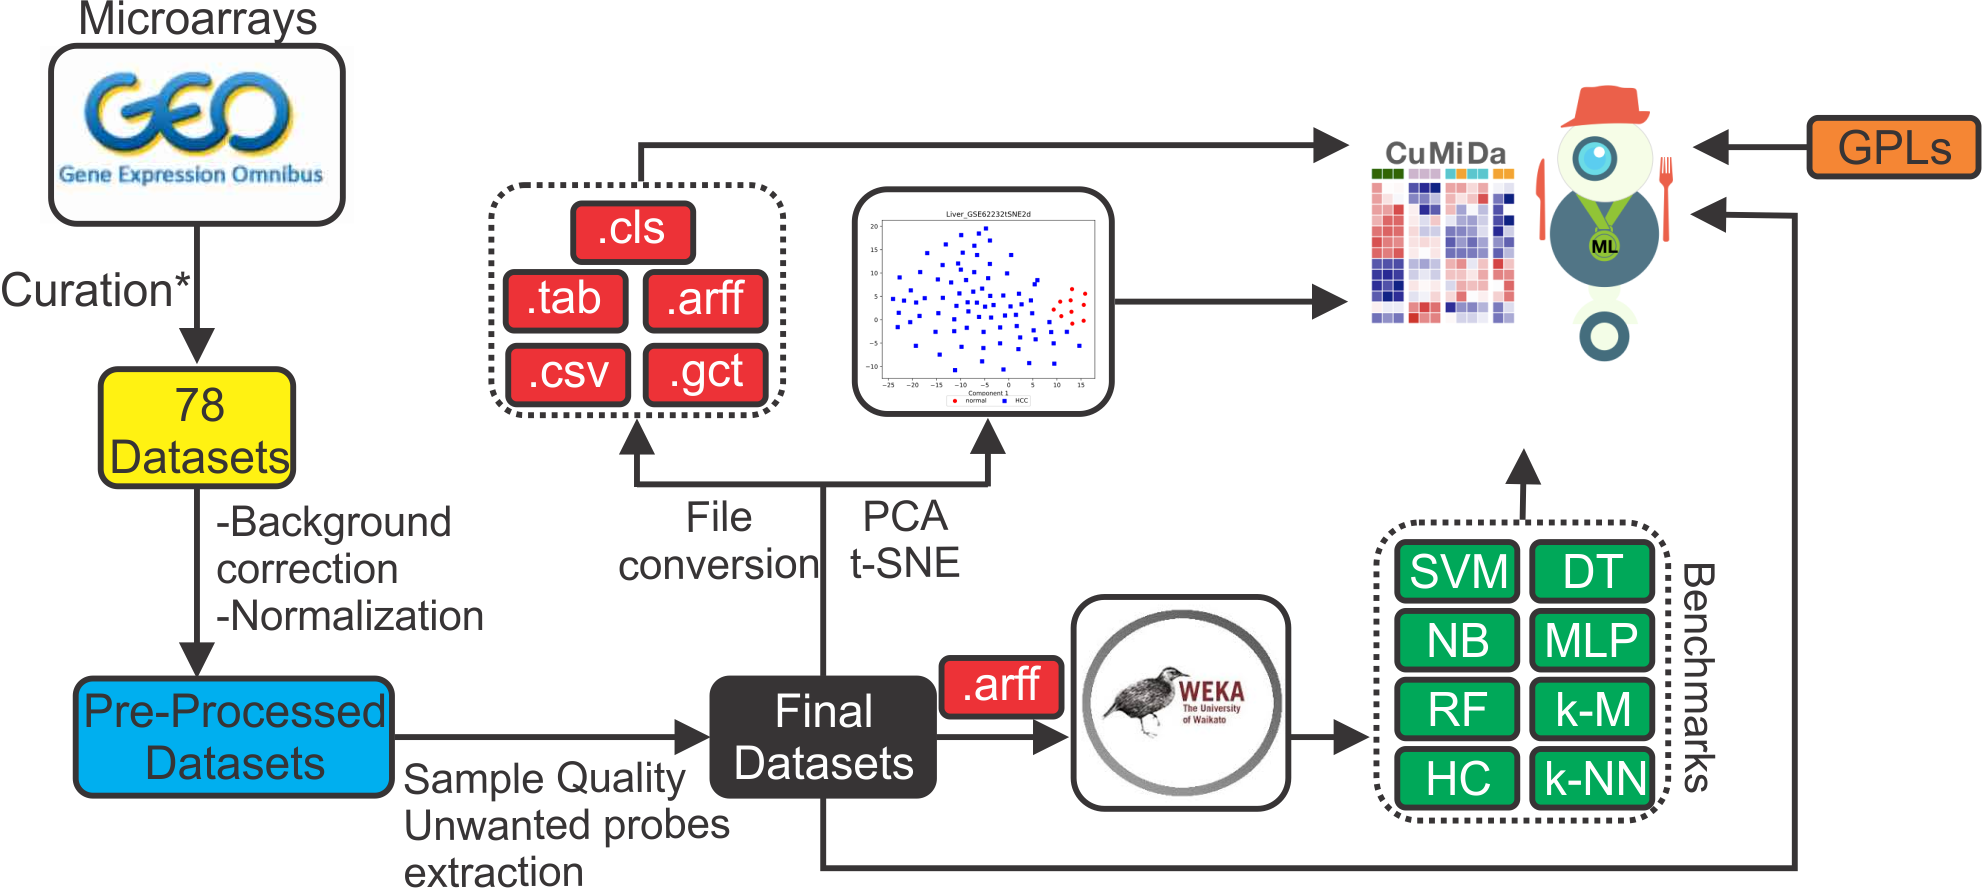

# My workflow

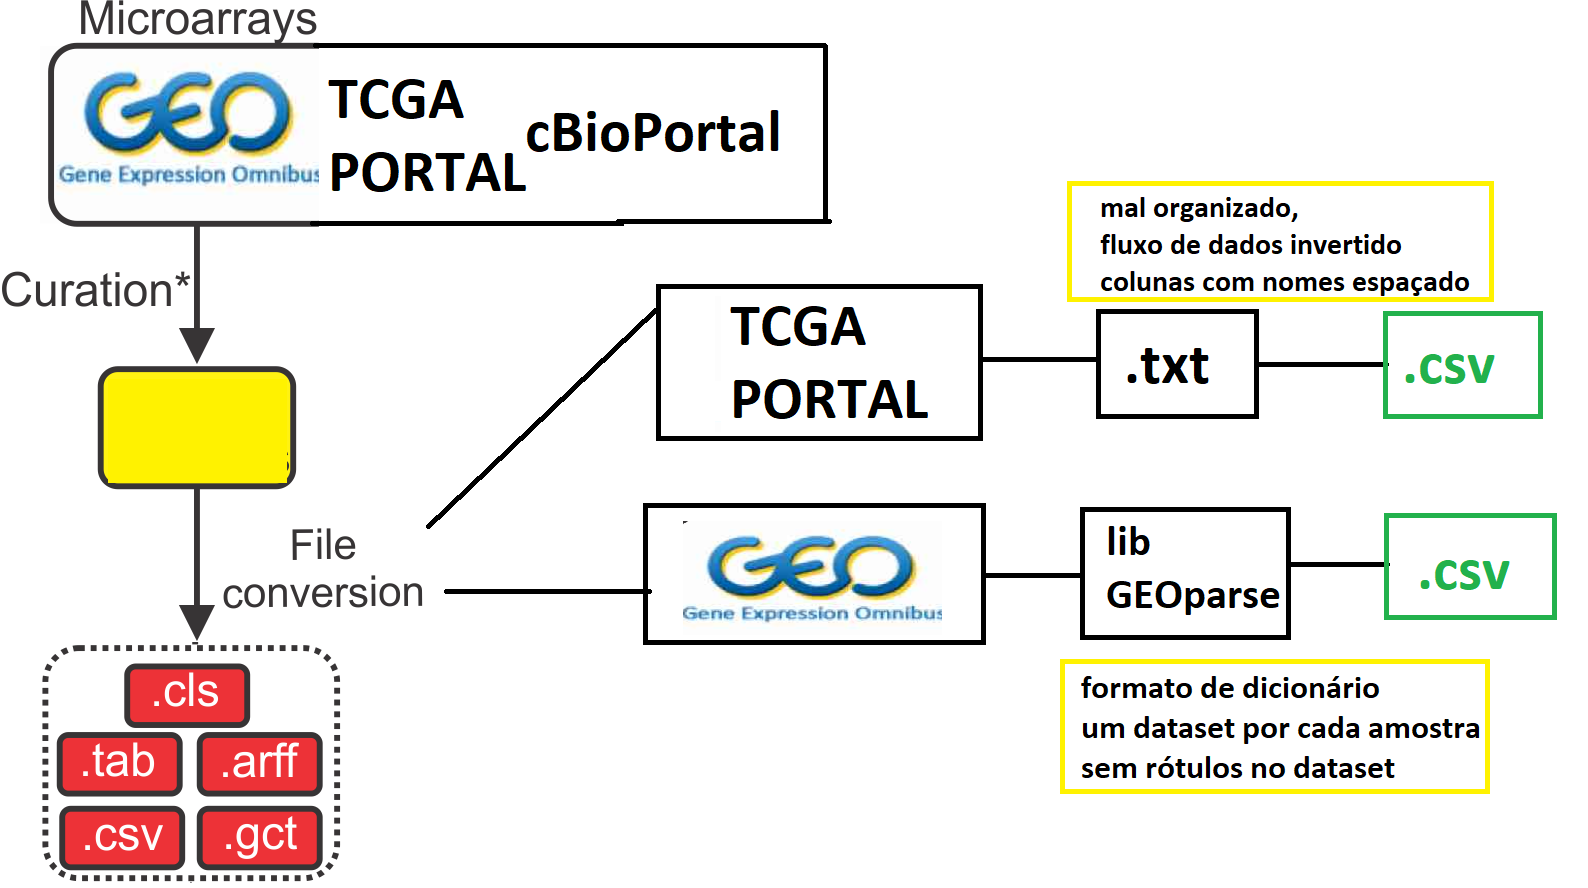

# Repositórios utilizados:
## Datasets from **Cumida UFRGS**
* ### [Breast_GSE70947.csv](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE70947) | Dataset modelo (289 amostras) | Julho, 2016


Esse banco é baseado em dados de expressão de subtipos de câncer de mama. A incidência de tumor de mama é aumentada pela **obesidade e idade**, que interagem para influenciar as populações de células inflamatórias no tecido mamário normal. No banco apresenta a diferença na expressão gênica entre 195 adenocarcinomas de mama e 195 amostras de tecido mamário normal adjacente, usando idade, índice de massa corporal (IMC) e subtipo de tumor como covariáveis.


* ### [Breast_GSE45827.csv](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE45827) | Dataset modelo (151 amostras) | Março, 2016

Banco baseado em dados de expressão de subtipos de câncer de mama. É um conjunto de pessoas com câncer de mama invasivo primário, obteve-se uma amostra do tumor na cirurgia antes de qualquer tratamento do paciente. O RNA total foi extraído de todas as amostras.

## Dataset from **Metabrick**
* ### [METABRIC_RNA_Mutation.csv](https://www.cbioportal.org/study/clinicalData?id=brca_metabric) | (1904 amostras, 693 features) | METABRIC, Nature 2012 & Nat Commun 2016

## Dataset from **TCGA**
* ### [TCGA-BRCA.csv](http://tcgaportal.org/index.html) | (1222 amostras, 60500 features) | 2019

## Dataset from **GEO**
* ### [GSE70951.csv](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE70951) | (433 amostras, +62000 features) | Jul, 2016

É uma "SuperSerie", que basicamente junta dois dataframes do site GEO: contendo dados do GSE70947 (Do CUMIDA) e GSE70905. Ambos datasets tem os mesmos embasadamento, porém falta algumas features em um ou outro que pode ser analisado na etapa de limpeza dos dados.
* ### [GSE93601.csv](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE93601) | (1110 amostras, +26000 features) | Agosto, 2017

É um dataset que foi usado como estudo para analisar a influência do consumo diário de álcool na ocorrência do câncer de mama.

---

Ref.: https://www.nature.com/articles/s41598-021-91290-4#:~:text=The%20TCGA-BRCA%20dataset%20downloaded%20from%20the,was%20calculated%20to%20evaluate%20statistical%20significance.&text=The%20TCGA-BRCA%20dataset%20downloaded,to%20evaluate%20statistical%20significance.&text=dataset%20downloaded%20from%20the,was%20calculated%20to%20evaluate

* Nesse último site são citados os Bancos da **TCGA-BRCA** e da **Metabrick**.

In [4]:
df_gse70947 = pd.read_csv('Breast_GSE70947.csv')

In [5]:
df_gse45827 = pd.read_csv('Breast_GSE45827.csv')

In [6]:
df_gse70947.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,lincRNA:chr4:77860976-77869926_F,NM_152343,NM_001005327,NM_001039355,lincRNA:chr21:44456656-44468556_R,lincRNA:chr9:4869500-4896050_F,NM_016053,NM_001080425,ENST00000555638,ENST00000508993
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,7.570363,6.368684,4.784042,10.747723,5.090500,5.994149,10.649336,8.969439,4.985693,5.090500
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,7.903335,5.713115,4.421074,11.299200,4.447052,4.421074,10.746854,8.174489,4.464177,4.536891
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,7.705765,6.595364,4.410870,10.576807,5.003699,6.529257,10.430034,8.473468,4.668447,5.084127
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,6.633058,5.786781,4.572984,11.175090,4.990888,6.669871,11.110395,8.880818,4.537626,4.648655
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,6.211581,5.538635,4.613828,12.014365,4.979883,6.414621,10.909805,9.526500,4.670490,4.613828


146 amostras normais
143 amostras com tumor


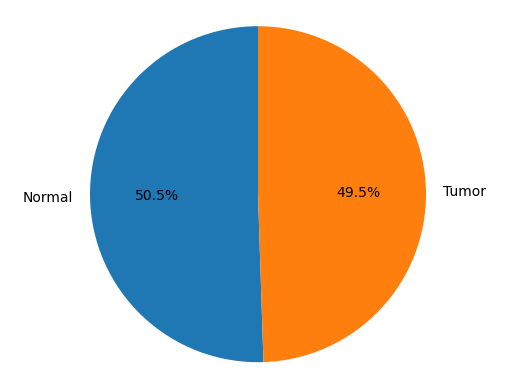

In [57]:
fig1, ax1 = plt.subplots()

labels = 'Normal', 'Tumor'
sizes = [df_gse70947['type'].value_counts().get('normal', 0), df_gse70947['type'].value_counts().get('breast_adenocarcinoma', 0)]

print("{} amostras normais\n{} amostras com tumor".format(*sizes))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis("equal")
plt.show()

In [7]:
df_gse45827.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [58]:
df_gse45827['type'].unique()

array(['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'],
      dtype=object)

41 basal
30 HER
14 cell_line
7 normal
29 luminal_A
30 luminal_B


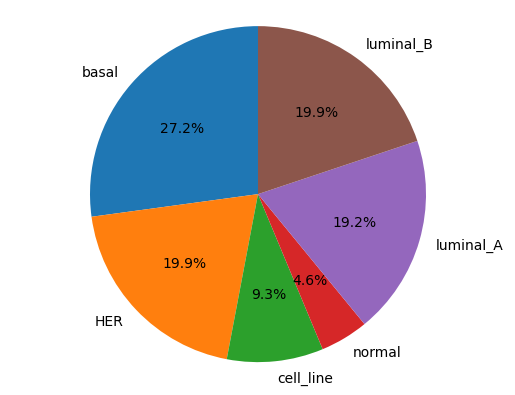

In [60]:
fig2, ax2 = plt.subplots()

labels = 'basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'
sizes = [df_gse45827['type'].value_counts().get('basal', 0), 
         df_gse45827['type'].value_counts().get('HER', 0),
        df_gse45827['type'].value_counts().get('cell_line', 0),
        df_gse45827['type'].value_counts().get('normal', 0),
        df_gse45827['type'].value_counts().get('luminal_A', 0),
        df_gse45827['type'].value_counts().get('luminal_B', 0)]


print("{} basal\n{} HER\n{} cell_line\n{} normal\n{} luminal_A\n{} luminal_B".format(*sizes))

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis("equal")
plt.show()

In [1]:
df_metabric = pd.read_csv('METABRIC_RNA_Mutation.csv', low_memory=False)

NameError: name 'pd' is not defined

In [9]:
df_metabric.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_metabric.columns.tolist()

['patient_id',
 'age_at_diagnosis',
 'type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'oncotree_code',
 'overall_survival_months',
 'overall_survival',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_size',
 'tumor_stage',
 'death_from_cancer',
 'brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1',
 'stk11',
 'bard1',
 'mlh1',
 'msh2',
 'msh6',
 'pms2',
 'epcam',
 'rad51c',
 'rad51d',
 'rad50',
 'rb1',
 'rbl1',
 'rbl2',
 'ccna1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd1',
 'cdk4',

In [63]:
df_metabric['pam50_+_claudin-low_subtype'].unique()

array(['claudin-low', 'LumA', 'LumB', 'Her2', 'Normal', 'Basal', 'NC'],
      dtype=object)

199 claudin-low
679 LumA
461 LumB
220 Her2
140 Normal
199 Basal
6 NC


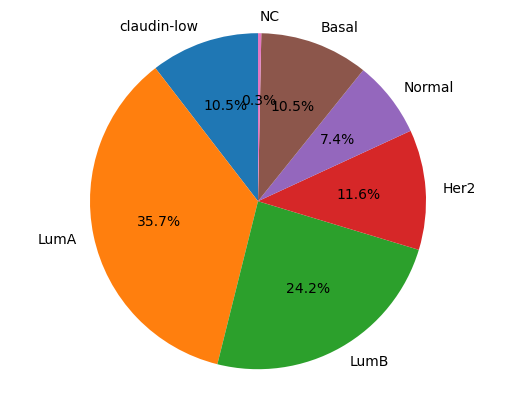

In [64]:
fig2, ax2 = plt.subplots()

labels = 'claudin-low', 'LumA', 'LumB', 'Her2', 'Normal', 'Basal', 'NC'
sizes = [df_metabric['pam50_+_claudin-low_subtype'].value_counts().get('claudin-low', 0), 
         df_metabric['pam50_+_claudin-low_subtype'].value_counts().get('LumA', 0),
        df_metabric['pam50_+_claudin-low_subtype'].value_counts().get('LumB', 0),
        df_metabric['pam50_+_claudin-low_subtype'].value_counts().get('Her2', 0),
        df_metabric['pam50_+_claudin-low_subtype'].value_counts().get('Normal', 0),
        df_metabric['pam50_+_claudin-low_subtype'].value_counts().get('Basal', 0),
        df_metabric['pam50_+_claudin-low_subtype'].value_counts().get('NC', 0)]


print("{} claudin-low\n{} LumA\n{} LumB\n{} Her2\n{} Normal\n{} Basal\n{} NC".format(*sizes))

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis("equal")
plt.show()

### Informações do banco do Metabric:
* Possuí cerca de 693 features
* Quantidade de RNAs avaliados é bem reduzida
* Aqui os rótulos são voltados para os tipos de câncer (PAM-50)
* Há algumas features de RNA já filtradas que talvez possam ser usadas.

In [11]:
# Aqui precisaremos realizar a conversão de 60500 linhas, cada linha equivale a uma coluna de nossa tabela,
# o arquivo .txt não estava totalmente formatado.

# Codigo utilizado para manipular o .txt bruto baixado: ele possuí 4 frases a mais em cada linha, assim
# para corrigir a leitura do dataframe, tive que excluir 3 seguidos de um \t, assim ficaria corretamente apenas uma
# identificacao para cada coluna de dados

with open('TCGA_BRCA.txt', 'r') as f:
    lines = f.readlines()

i=1    
with open('TCGA_BRCA.txt', 'w') as f:
    for line in lines:
        try:
            parts = line.split('\t')
            new_line = '\t'.join(parts[3:])
            f.write(new_line)
            print(f'linha {i} concluida com sucesso')
        except Exception as e:
            print(f'Erro ao corrigir linha {i}: {e}')
        i+=1


linha 1 concluida com sucesso
linha 2 concluida com sucesso
linha 3 concluida com sucesso
linha 4 concluida com sucesso
linha 5 concluida com sucesso
linha 6 concluida com sucesso
linha 7 concluida com sucesso
linha 8 concluida com sucesso
linha 9 concluida com sucesso
linha 10 concluida com sucesso
linha 11 concluida com sucesso
linha 12 concluida com sucesso
linha 13 concluida com sucesso
linha 14 concluida com sucesso
linha 15 concluida com sucesso
linha 16 concluida com sucesso
linha 17 concluida com sucesso
linha 18 concluida com sucesso
linha 19 concluida com sucesso
linha 20 concluida com sucesso
linha 21 concluida com sucesso
linha 22 concluida com sucesso
linha 23 concluida com sucesso
linha 24 concluida com sucesso
linha 25 concluida com sucesso
linha 26 concluida com sucesso
linha 27 concluida com sucesso
linha 28 concluida com sucesso
linha 29 concluida com sucesso
linha 30 concluida com sucesso
linha 31 concluida com sucesso
linha 32 concluida com sucesso
linha 33 concluid

linha 1772 concluida com sucesso
linha 1773 concluida com sucesso
linha 1774 concluida com sucesso
linha 1775 concluida com sucesso
linha 1776 concluida com sucesso
linha 1777 concluida com sucesso
linha 1778 concluida com sucesso
linha 1779 concluida com sucesso
linha 1780 concluida com sucesso
linha 1781 concluida com sucesso
linha 1782 concluida com sucesso
linha 1783 concluida com sucesso
linha 1784 concluida com sucesso
linha 1785 concluida com sucesso
linha 1786 concluida com sucesso
linha 1787 concluida com sucesso
linha 1788 concluida com sucesso
linha 1789 concluida com sucesso
linha 1790 concluida com sucesso
linha 1791 concluida com sucesso
linha 1792 concluida com sucesso
linha 1793 concluida com sucesso
linha 1794 concluida com sucesso
linha 1795 concluida com sucesso
linha 1796 concluida com sucesso
linha 1797 concluida com sucesso
linha 1798 concluida com sucesso
linha 1799 concluida com sucesso
linha 1800 concluida com sucesso
linha 1801 concluida com sucesso
linha 1802

linha 3369 concluida com sucesso
linha 3370 concluida com sucesso
linha 3371 concluida com sucesso
linha 3372 concluida com sucesso
linha 3373 concluida com sucesso
linha 3374 concluida com sucesso
linha 3375 concluida com sucesso
linha 3376 concluida com sucesso
linha 3377 concluida com sucesso
linha 3378 concluida com sucesso
linha 3379 concluida com sucesso
linha 3380 concluida com sucesso
linha 3381 concluida com sucesso
linha 3382 concluida com sucesso
linha 3383 concluida com sucesso
linha 3384 concluida com sucesso
linha 3385 concluida com sucesso
linha 3386 concluida com sucesso
linha 3387 concluida com sucesso
linha 3388 concluida com sucesso
linha 3389 concluida com sucesso
linha 3390 concluida com sucesso
linha 3391 concluida com sucesso
linha 3392 concluida com sucesso
linha 3393 concluida com sucesso
linha 3394 concluida com sucesso
linha 3395 concluida com sucesso
linha 3396 concluida com sucesso
linha 3397 concluida com sucesso
linha 3398 concluida com sucesso
linha 3399

linha 5042 concluida com sucesso
linha 5043 concluida com sucesso
linha 5044 concluida com sucesso
linha 5045 concluida com sucesso
linha 5046 concluida com sucesso
linha 5047 concluida com sucesso
linha 5048 concluida com sucesso
linha 5049 concluida com sucesso
linha 5050 concluida com sucesso
linha 5051 concluida com sucesso
linha 5052 concluida com sucesso
linha 5053 concluida com sucesso
linha 5054 concluida com sucesso
linha 5055 concluida com sucesso
linha 5056 concluida com sucesso
linha 5057 concluida com sucesso
linha 5058 concluida com sucesso
linha 5059 concluida com sucesso
linha 5060 concluida com sucesso
linha 5061 concluida com sucesso
linha 5062 concluida com sucesso
linha 5063 concluida com sucesso
linha 5064 concluida com sucesso
linha 5065 concluida com sucesso
linha 5066 concluida com sucesso
linha 5067 concluida com sucesso
linha 5068 concluida com sucesso
linha 5069 concluida com sucesso
linha 5070 concluida com sucesso
linha 5071 concluida com sucesso
linha 5072

linha 6711 concluida com sucesso
linha 6712 concluida com sucesso
linha 6713 concluida com sucesso
linha 6714 concluida com sucesso
linha 6715 concluida com sucesso
linha 6716 concluida com sucesso
linha 6717 concluida com sucesso
linha 6718 concluida com sucesso
linha 6719 concluida com sucesso
linha 6720 concluida com sucesso
linha 6721 concluida com sucesso
linha 6722 concluida com sucesso
linha 6723 concluida com sucesso
linha 6724 concluida com sucesso
linha 6725 concluida com sucesso
linha 6726 concluida com sucesso
linha 6727 concluida com sucesso
linha 6728 concluida com sucesso
linha 6729 concluida com sucesso
linha 6730 concluida com sucesso
linha 6731 concluida com sucesso
linha 6732 concluida com sucesso
linha 6733 concluida com sucesso
linha 6734 concluida com sucesso
linha 6735 concluida com sucesso
linha 6736 concluida com sucesso
linha 6737 concluida com sucesso
linha 6738 concluida com sucesso
linha 6739 concluida com sucesso
linha 6740 concluida com sucesso
linha 6741

linha 8298 concluida com sucesso
linha 8299 concluida com sucesso
linha 8300 concluida com sucesso
linha 8301 concluida com sucesso
linha 8302 concluida com sucesso
linha 8303 concluida com sucesso
linha 8304 concluida com sucesso
linha 8305 concluida com sucesso
linha 8306 concluida com sucesso
linha 8307 concluida com sucesso
linha 8308 concluida com sucesso
linha 8309 concluida com sucesso
linha 8310 concluida com sucesso
linha 8311 concluida com sucesso
linha 8312 concluida com sucesso
linha 8313 concluida com sucesso
linha 8314 concluida com sucesso
linha 8315 concluida com sucesso
linha 8316 concluida com sucesso
linha 8317 concluida com sucesso
linha 8318 concluida com sucesso
linha 8319 concluida com sucesso
linha 8320 concluida com sucesso
linha 8321 concluida com sucesso
linha 8322 concluida com sucesso
linha 8323 concluida com sucesso
linha 8324 concluida com sucesso
linha 8325 concluida com sucesso
linha 8326 concluida com sucesso
linha 8327 concluida com sucesso
linha 8328

linha 9909 concluida com sucesso
linha 9910 concluida com sucesso
linha 9911 concluida com sucesso
linha 9912 concluida com sucesso
linha 9913 concluida com sucesso
linha 9914 concluida com sucesso
linha 9915 concluida com sucesso
linha 9916 concluida com sucesso
linha 9917 concluida com sucesso
linha 9918 concluida com sucesso
linha 9919 concluida com sucesso
linha 9920 concluida com sucesso
linha 9921 concluida com sucesso
linha 9922 concluida com sucesso
linha 9923 concluida com sucesso
linha 9924 concluida com sucesso
linha 9925 concluida com sucesso
linha 9926 concluida com sucesso
linha 9927 concluida com sucesso
linha 9928 concluida com sucesso
linha 9929 concluida com sucesso
linha 9930 concluida com sucesso
linha 9931 concluida com sucesso
linha 9932 concluida com sucesso
linha 9933 concluida com sucesso
linha 9934 concluida com sucesso
linha 9935 concluida com sucesso
linha 9936 concluida com sucesso
linha 9937 concluida com sucesso
linha 9938 concluida com sucesso
linha 9939

linha 11502 concluida com sucesso
linha 11503 concluida com sucesso
linha 11504 concluida com sucesso
linha 11505 concluida com sucesso
linha 11506 concluida com sucesso
linha 11507 concluida com sucesso
linha 11508 concluida com sucesso
linha 11509 concluida com sucesso
linha 11510 concluida com sucesso
linha 11511 concluida com sucesso
linha 11512 concluida com sucesso
linha 11513 concluida com sucesso
linha 11514 concluida com sucesso
linha 11515 concluida com sucesso
linha 11516 concluida com sucesso
linha 11517 concluida com sucesso
linha 11518 concluida com sucesso
linha 11519 concluida com sucesso
linha 11520 concluida com sucesso
linha 11521 concluida com sucesso
linha 11522 concluida com sucesso
linha 11523 concluida com sucesso
linha 11524 concluida com sucesso
linha 11525 concluida com sucesso
linha 11526 concluida com sucesso
linha 11527 concluida com sucesso
linha 11528 concluida com sucesso
linha 11529 concluida com sucesso
linha 11530 concluida com sucesso
linha 11531 co

linha 13122 concluida com sucesso
linha 13123 concluida com sucesso
linha 13124 concluida com sucesso
linha 13125 concluida com sucesso
linha 13126 concluida com sucesso
linha 13127 concluida com sucesso
linha 13128 concluida com sucesso
linha 13129 concluida com sucesso
linha 13130 concluida com sucesso
linha 13131 concluida com sucesso
linha 13132 concluida com sucesso
linha 13133 concluida com sucesso
linha 13134 concluida com sucesso
linha 13135 concluida com sucesso
linha 13136 concluida com sucesso
linha 13137 concluida com sucesso
linha 13138 concluida com sucesso
linha 13139 concluida com sucesso
linha 13140 concluida com sucesso
linha 13141 concluida com sucesso
linha 13142 concluida com sucesso
linha 13143 concluida com sucesso
linha 13144 concluida com sucesso
linha 13145 concluida com sucesso
linha 13146 concluida com sucesso
linha 13147 concluida com sucesso
linha 13148 concluida com sucesso
linha 13149 concluida com sucesso
linha 13150 concluida com sucesso
linha 13151 co

linha 14762 concluida com sucesso
linha 14763 concluida com sucesso
linha 14764 concluida com sucesso
linha 14765 concluida com sucesso
linha 14766 concluida com sucesso
linha 14767 concluida com sucesso
linha 14768 concluida com sucesso
linha 14769 concluida com sucesso
linha 14770 concluida com sucesso
linha 14771 concluida com sucesso
linha 14772 concluida com sucesso
linha 14773 concluida com sucesso
linha 14774 concluida com sucesso
linha 14775 concluida com sucesso
linha 14776 concluida com sucesso
linha 14777 concluida com sucesso
linha 14778 concluida com sucesso
linha 14779 concluida com sucesso
linha 14780 concluida com sucesso
linha 14781 concluida com sucesso
linha 14782 concluida com sucesso
linha 14783 concluida com sucesso
linha 14784 concluida com sucesso
linha 14785 concluida com sucesso
linha 14786 concluida com sucesso
linha 14787 concluida com sucesso
linha 14788 concluida com sucesso
linha 14789 concluida com sucesso
linha 14790 concluida com sucesso
linha 14791 co

linha 16325 concluida com sucesso
linha 16326 concluida com sucesso
linha 16327 concluida com sucesso
linha 16328 concluida com sucesso
linha 16329 concluida com sucesso
linha 16330 concluida com sucesso
linha 16331 concluida com sucesso
linha 16332 concluida com sucesso
linha 16333 concluida com sucesso
linha 16334 concluida com sucesso
linha 16335 concluida com sucesso
linha 16336 concluida com sucesso
linha 16337 concluida com sucesso
linha 16338 concluida com sucesso
linha 16339 concluida com sucesso
linha 16340 concluida com sucesso
linha 16341 concluida com sucesso
linha 16342 concluida com sucesso
linha 16343 concluida com sucesso
linha 16344 concluida com sucesso
linha 16345 concluida com sucesso
linha 16346 concluida com sucesso
linha 16347 concluida com sucesso
linha 16348 concluida com sucesso
linha 16349 concluida com sucesso
linha 16350 concluida com sucesso
linha 16351 concluida com sucesso
linha 16352 concluida com sucesso
linha 16353 concluida com sucesso
linha 16354 co

linha 17974 concluida com sucesso
linha 17975 concluida com sucesso
linha 17976 concluida com sucesso
linha 17977 concluida com sucesso
linha 17978 concluida com sucesso
linha 17979 concluida com sucesso
linha 17980 concluida com sucesso
linha 17981 concluida com sucesso
linha 17982 concluida com sucesso
linha 17983 concluida com sucesso
linha 17984 concluida com sucesso
linha 17985 concluida com sucesso
linha 17986 concluida com sucesso
linha 17987 concluida com sucesso
linha 17988 concluida com sucesso
linha 17989 concluida com sucesso
linha 17990 concluida com sucesso
linha 17991 concluida com sucesso
linha 17992 concluida com sucesso
linha 17993 concluida com sucesso
linha 17994 concluida com sucesso
linha 17995 concluida com sucesso
linha 17996 concluida com sucesso
linha 17997 concluida com sucesso
linha 17998 concluida com sucesso
linha 17999 concluida com sucesso
linha 18000 concluida com sucesso
linha 18001 concluida com sucesso
linha 18002 concluida com sucesso
linha 18003 co

linha 19580 concluida com sucesso
linha 19581 concluida com sucesso
linha 19582 concluida com sucesso
linha 19583 concluida com sucesso
linha 19584 concluida com sucesso
linha 19585 concluida com sucesso
linha 19586 concluida com sucesso
linha 19587 concluida com sucesso
linha 19588 concluida com sucesso
linha 19589 concluida com sucesso
linha 19590 concluida com sucesso
linha 19591 concluida com sucesso
linha 19592 concluida com sucesso
linha 19593 concluida com sucesso
linha 19594 concluida com sucesso
linha 19595 concluida com sucesso
linha 19596 concluida com sucesso
linha 19597 concluida com sucesso
linha 19598 concluida com sucesso
linha 19599 concluida com sucesso
linha 19600 concluida com sucesso
linha 19601 concluida com sucesso
linha 19602 concluida com sucesso
linha 19603 concluida com sucesso
linha 19604 concluida com sucesso
linha 19605 concluida com sucesso
linha 19606 concluida com sucesso
linha 19607 concluida com sucesso
linha 19608 concluida com sucesso
linha 19609 co

linha 21262 concluida com sucesso
linha 21263 concluida com sucesso
linha 21264 concluida com sucesso
linha 21265 concluida com sucesso
linha 21266 concluida com sucesso
linha 21267 concluida com sucesso
linha 21268 concluida com sucesso
linha 21269 concluida com sucesso
linha 21270 concluida com sucesso
linha 21271 concluida com sucesso
linha 21272 concluida com sucesso
linha 21273 concluida com sucesso
linha 21274 concluida com sucesso
linha 21275 concluida com sucesso
linha 21276 concluida com sucesso
linha 21277 concluida com sucesso
linha 21278 concluida com sucesso
linha 21279 concluida com sucesso
linha 21280 concluida com sucesso
linha 21281 concluida com sucesso
linha 21282 concluida com sucesso
linha 21283 concluida com sucesso
linha 21284 concluida com sucesso
linha 21285 concluida com sucesso
linha 21286 concluida com sucesso
linha 21287 concluida com sucesso
linha 21288 concluida com sucesso
linha 21289 concluida com sucesso
linha 21290 concluida com sucesso
linha 21291 co

linha 22880 concluida com sucesso
linha 22881 concluida com sucesso
linha 22882 concluida com sucesso
linha 22883 concluida com sucesso
linha 22884 concluida com sucesso
linha 22885 concluida com sucesso
linha 22886 concluida com sucesso
linha 22887 concluida com sucesso
linha 22888 concluida com sucesso
linha 22889 concluida com sucesso
linha 22890 concluida com sucesso
linha 22891 concluida com sucesso
linha 22892 concluida com sucesso
linha 22893 concluida com sucesso
linha 22894 concluida com sucesso
linha 22895 concluida com sucesso
linha 22896 concluida com sucesso
linha 22897 concluida com sucesso
linha 22898 concluida com sucesso
linha 22899 concluida com sucesso
linha 22900 concluida com sucesso
linha 22901 concluida com sucesso
linha 22902 concluida com sucesso
linha 22903 concluida com sucesso
linha 22904 concluida com sucesso
linha 22905 concluida com sucesso
linha 22906 concluida com sucesso
linha 22907 concluida com sucesso
linha 22908 concluida com sucesso
linha 22909 co

linha 24490 concluida com sucesso
linha 24491 concluida com sucesso
linha 24492 concluida com sucesso
linha 24493 concluida com sucesso
linha 24494 concluida com sucesso
linha 24495 concluida com sucesso
linha 24496 concluida com sucesso
linha 24497 concluida com sucesso
linha 24498 concluida com sucesso
linha 24499 concluida com sucesso
linha 24500 concluida com sucesso
linha 24501 concluida com sucesso
linha 24502 concluida com sucesso
linha 24503 concluida com sucesso
linha 24504 concluida com sucesso
linha 24505 concluida com sucesso
linha 24506 concluida com sucesso
linha 24507 concluida com sucesso
linha 24508 concluida com sucesso
linha 24509 concluida com sucesso
linha 24510 concluida com sucesso
linha 24511 concluida com sucesso
linha 24512 concluida com sucesso
linha 24513 concluida com sucesso
linha 24514 concluida com sucesso
linha 24515 concluida com sucesso
linha 24516 concluida com sucesso
linha 24517 concluida com sucesso
linha 24518 concluida com sucesso
linha 24519 co

linha 26085 concluida com sucesso
linha 26086 concluida com sucesso
linha 26087 concluida com sucesso
linha 26088 concluida com sucesso
linha 26089 concluida com sucesso
linha 26090 concluida com sucesso
linha 26091 concluida com sucesso
linha 26092 concluida com sucesso
linha 26093 concluida com sucesso
linha 26094 concluida com sucesso
linha 26095 concluida com sucesso
linha 26096 concluida com sucesso
linha 26097 concluida com sucesso
linha 26098 concluida com sucesso
linha 26099 concluida com sucesso
linha 26100 concluida com sucesso
linha 26101 concluida com sucesso
linha 26102 concluida com sucesso
linha 26103 concluida com sucesso
linha 26104 concluida com sucesso
linha 26105 concluida com sucesso
linha 26106 concluida com sucesso
linha 26107 concluida com sucesso
linha 26108 concluida com sucesso
linha 26109 concluida com sucesso
linha 26110 concluida com sucesso
linha 26111 concluida com sucesso
linha 26112 concluida com sucesso
linha 26113 concluida com sucesso
linha 26114 co

linha 27838 concluida com sucesso
linha 27839 concluida com sucesso
linha 27840 concluida com sucesso
linha 27841 concluida com sucesso
linha 27842 concluida com sucesso
linha 27843 concluida com sucesso
linha 27844 concluida com sucesso
linha 27845 concluida com sucesso
linha 27846 concluida com sucesso
linha 27847 concluida com sucesso
linha 27848 concluida com sucesso
linha 27849 concluida com sucesso
linha 27850 concluida com sucesso
linha 27851 concluida com sucesso
linha 27852 concluida com sucesso
linha 27853 concluida com sucesso
linha 27854 concluida com sucesso
linha 27855 concluida com sucesso
linha 27856 concluida com sucesso
linha 27857 concluida com sucesso
linha 27858 concluida com sucesso
linha 27859 concluida com sucesso
linha 27860 concluida com sucesso
linha 27861 concluida com sucesso
linha 27862 concluida com sucesso
linha 27863 concluida com sucesso
linha 27864 concluida com sucesso
linha 27865 concluida com sucesso
linha 27866 concluida com sucesso
linha 27867 co

linha 29415 concluida com sucesso
linha 29416 concluida com sucesso
linha 29417 concluida com sucesso
linha 29418 concluida com sucesso
linha 29419 concluida com sucesso
linha 29420 concluida com sucesso
linha 29421 concluida com sucesso
linha 29422 concluida com sucesso
linha 29423 concluida com sucesso
linha 29424 concluida com sucesso
linha 29425 concluida com sucesso
linha 29426 concluida com sucesso
linha 29427 concluida com sucesso
linha 29428 concluida com sucesso
linha 29429 concluida com sucesso
linha 29430 concluida com sucesso
linha 29431 concluida com sucesso
linha 29432 concluida com sucesso
linha 29433 concluida com sucesso
linha 29434 concluida com sucesso
linha 29435 concluida com sucesso
linha 29436 concluida com sucesso
linha 29437 concluida com sucesso
linha 29438 concluida com sucesso
linha 29439 concluida com sucesso
linha 29440 concluida com sucesso
linha 29441 concluida com sucesso
linha 29442 concluida com sucesso
linha 29443 concluida com sucesso
linha 29444 co

linha 30999 concluida com sucesso
linha 31000 concluida com sucesso
linha 31001 concluida com sucesso
linha 31002 concluida com sucesso
linha 31003 concluida com sucesso
linha 31004 concluida com sucesso
linha 31005 concluida com sucesso
linha 31006 concluida com sucesso
linha 31007 concluida com sucesso
linha 31008 concluida com sucesso
linha 31009 concluida com sucesso
linha 31010 concluida com sucesso
linha 31011 concluida com sucesso
linha 31012 concluida com sucesso
linha 31013 concluida com sucesso
linha 31014 concluida com sucesso
linha 31015 concluida com sucesso
linha 31016 concluida com sucesso
linha 31017 concluida com sucesso
linha 31018 concluida com sucesso
linha 31019 concluida com sucesso
linha 31020 concluida com sucesso
linha 31021 concluida com sucesso
linha 31022 concluida com sucesso
linha 31023 concluida com sucesso
linha 31024 concluida com sucesso
linha 31025 concluida com sucesso
linha 31026 concluida com sucesso
linha 31027 concluida com sucesso
linha 31028 co

linha 32534 concluida com sucesso
linha 32535 concluida com sucesso
linha 32536 concluida com sucesso
linha 32537 concluida com sucesso
linha 32538 concluida com sucesso
linha 32539 concluida com sucesso
linha 32540 concluida com sucesso
linha 32541 concluida com sucesso
linha 32542 concluida com sucesso
linha 32543 concluida com sucesso
linha 32544 concluida com sucesso
linha 32545 concluida com sucesso
linha 32546 concluida com sucesso
linha 32547 concluida com sucesso
linha 32548 concluida com sucesso
linha 32549 concluida com sucesso
linha 32550 concluida com sucesso
linha 32551 concluida com sucesso
linha 32552 concluida com sucesso
linha 32553 concluida com sucesso
linha 32554 concluida com sucesso
linha 32555 concluida com sucesso
linha 32556 concluida com sucesso
linha 32557 concluida com sucesso
linha 32558 concluida com sucesso
linha 32559 concluida com sucesso
linha 32560 concluida com sucesso
linha 32561 concluida com sucesso
linha 32562 concluida com sucesso
linha 32563 co

linha 34043 concluida com sucesso
linha 34044 concluida com sucesso
linha 34045 concluida com sucesso
linha 34046 concluida com sucesso
linha 34047 concluida com sucesso
linha 34048 concluida com sucesso
linha 34049 concluida com sucesso
linha 34050 concluida com sucesso
linha 34051 concluida com sucesso
linha 34052 concluida com sucesso
linha 34053 concluida com sucesso
linha 34054 concluida com sucesso
linha 34055 concluida com sucesso
linha 34056 concluida com sucesso
linha 34057 concluida com sucesso
linha 34058 concluida com sucesso
linha 34059 concluida com sucesso
linha 34060 concluida com sucesso
linha 34061 concluida com sucesso
linha 34062 concluida com sucesso
linha 34063 concluida com sucesso
linha 34064 concluida com sucesso
linha 34065 concluida com sucesso
linha 34066 concluida com sucesso
linha 34067 concluida com sucesso
linha 34068 concluida com sucesso
linha 34069 concluida com sucesso
linha 34070 concluida com sucesso
linha 34071 concluida com sucesso
linha 34072 co

linha 35634 concluida com sucesso
linha 35635 concluida com sucesso
linha 35636 concluida com sucesso
linha 35637 concluida com sucesso
linha 35638 concluida com sucesso
linha 35639 concluida com sucesso
linha 35640 concluida com sucesso
linha 35641 concluida com sucesso
linha 35642 concluida com sucesso
linha 35643 concluida com sucesso
linha 35644 concluida com sucesso
linha 35645 concluida com sucesso
linha 35646 concluida com sucesso
linha 35647 concluida com sucesso
linha 35648 concluida com sucesso
linha 35649 concluida com sucesso
linha 35650 concluida com sucesso
linha 35651 concluida com sucesso
linha 35652 concluida com sucesso
linha 35653 concluida com sucesso
linha 35654 concluida com sucesso
linha 35655 concluida com sucesso
linha 35656 concluida com sucesso
linha 35657 concluida com sucesso
linha 35658 concluida com sucesso
linha 35659 concluida com sucesso
linha 35660 concluida com sucesso
linha 35661 concluida com sucesso
linha 35662 concluida com sucesso
linha 35663 co

linha 37256 concluida com sucesso
linha 37257 concluida com sucesso
linha 37258 concluida com sucesso
linha 37259 concluida com sucesso
linha 37260 concluida com sucesso
linha 37261 concluida com sucesso
linha 37262 concluida com sucesso
linha 37263 concluida com sucesso
linha 37264 concluida com sucesso
linha 37265 concluida com sucesso
linha 37266 concluida com sucesso
linha 37267 concluida com sucesso
linha 37268 concluida com sucesso
linha 37269 concluida com sucesso
linha 37270 concluida com sucesso
linha 37271 concluida com sucesso
linha 37272 concluida com sucesso
linha 37273 concluida com sucesso
linha 37274 concluida com sucesso
linha 37275 concluida com sucesso
linha 37276 concluida com sucesso
linha 37277 concluida com sucesso
linha 37278 concluida com sucesso
linha 37279 concluida com sucesso
linha 37280 concluida com sucesso
linha 37281 concluida com sucesso
linha 37282 concluida com sucesso
linha 37283 concluida com sucesso
linha 37284 concluida com sucesso
linha 37285 co

linha 38869 concluida com sucesso
linha 38870 concluida com sucesso
linha 38871 concluida com sucesso
linha 38872 concluida com sucesso
linha 38873 concluida com sucesso
linha 38874 concluida com sucesso
linha 38875 concluida com sucesso
linha 38876 concluida com sucesso
linha 38877 concluida com sucesso
linha 38878 concluida com sucesso
linha 38879 concluida com sucesso
linha 38880 concluida com sucesso
linha 38881 concluida com sucesso
linha 38882 concluida com sucesso
linha 38883 concluida com sucesso
linha 38884 concluida com sucesso
linha 38885 concluida com sucesso
linha 38886 concluida com sucesso
linha 38887 concluida com sucesso
linha 38888 concluida com sucesso
linha 38889 concluida com sucesso
linha 38890 concluida com sucesso
linha 38891 concluida com sucesso
linha 38892 concluida com sucesso
linha 38893 concluida com sucesso
linha 38894 concluida com sucesso
linha 38895 concluida com sucesso
linha 38896 concluida com sucesso
linha 38897 concluida com sucesso
linha 38898 co

linha 40361 concluida com sucesso
linha 40362 concluida com sucesso
linha 40363 concluida com sucesso
linha 40364 concluida com sucesso
linha 40365 concluida com sucesso
linha 40366 concluida com sucesso
linha 40367 concluida com sucesso
linha 40368 concluida com sucesso
linha 40369 concluida com sucesso
linha 40370 concluida com sucesso
linha 40371 concluida com sucesso
linha 40372 concluida com sucesso
linha 40373 concluida com sucesso
linha 40374 concluida com sucesso
linha 40375 concluida com sucesso
linha 40376 concluida com sucesso
linha 40377 concluida com sucesso
linha 40378 concluida com sucesso
linha 40379 concluida com sucesso
linha 40380 concluida com sucesso
linha 40381 concluida com sucesso
linha 40382 concluida com sucesso
linha 40383 concluida com sucesso
linha 40384 concluida com sucesso
linha 40385 concluida com sucesso
linha 40386 concluida com sucesso
linha 40387 concluida com sucesso
linha 40388 concluida com sucesso
linha 40389 concluida com sucesso
linha 40390 co

linha 42007 concluida com sucesso
linha 42008 concluida com sucesso
linha 42009 concluida com sucesso
linha 42010 concluida com sucesso
linha 42011 concluida com sucesso
linha 42012 concluida com sucesso
linha 42013 concluida com sucesso
linha 42014 concluida com sucesso
linha 42015 concluida com sucesso
linha 42016 concluida com sucesso
linha 42017 concluida com sucesso
linha 42018 concluida com sucesso
linha 42019 concluida com sucesso
linha 42020 concluida com sucesso
linha 42021 concluida com sucesso
linha 42022 concluida com sucesso
linha 42023 concluida com sucesso
linha 42024 concluida com sucesso
linha 42025 concluida com sucesso
linha 42026 concluida com sucesso
linha 42027 concluida com sucesso
linha 42028 concluida com sucesso
linha 42029 concluida com sucesso
linha 42030 concluida com sucesso
linha 42031 concluida com sucesso
linha 42032 concluida com sucesso
linha 42033 concluida com sucesso
linha 42034 concluida com sucesso
linha 42035 concluida com sucesso
linha 42036 co

linha 43527 concluida com sucesso
linha 43528 concluida com sucesso
linha 43529 concluida com sucesso
linha 43530 concluida com sucesso
linha 43531 concluida com sucesso
linha 43532 concluida com sucesso
linha 43533 concluida com sucesso
linha 43534 concluida com sucesso
linha 43535 concluida com sucesso
linha 43536 concluida com sucesso
linha 43537 concluida com sucesso
linha 43538 concluida com sucesso
linha 43539 concluida com sucesso
linha 43540 concluida com sucesso
linha 43541 concluida com sucesso
linha 43542 concluida com sucesso
linha 43543 concluida com sucesso
linha 43544 concluida com sucesso
linha 43545 concluida com sucesso
linha 43546 concluida com sucesso
linha 43547 concluida com sucesso
linha 43548 concluida com sucesso
linha 43549 concluida com sucesso
linha 43550 concluida com sucesso
linha 43551 concluida com sucesso
linha 43552 concluida com sucesso
linha 43553 concluida com sucesso
linha 43554 concluida com sucesso
linha 43555 concluida com sucesso
linha 43556 co

linha 45017 concluida com sucesso
linha 45018 concluida com sucesso
linha 45019 concluida com sucesso
linha 45020 concluida com sucesso
linha 45021 concluida com sucesso
linha 45022 concluida com sucesso
linha 45023 concluida com sucesso
linha 45024 concluida com sucesso
linha 45025 concluida com sucesso
linha 45026 concluida com sucesso
linha 45027 concluida com sucesso
linha 45028 concluida com sucesso
linha 45029 concluida com sucesso
linha 45030 concluida com sucesso
linha 45031 concluida com sucesso
linha 45032 concluida com sucesso
linha 45033 concluida com sucesso
linha 45034 concluida com sucesso
linha 45035 concluida com sucesso
linha 45036 concluida com sucesso
linha 45037 concluida com sucesso
linha 45038 concluida com sucesso
linha 45039 concluida com sucesso
linha 45040 concluida com sucesso
linha 45041 concluida com sucesso
linha 45042 concluida com sucesso
linha 45043 concluida com sucesso
linha 45044 concluida com sucesso
linha 45045 concluida com sucesso
linha 45046 co

linha 46575 concluida com sucesso
linha 46576 concluida com sucesso
linha 46577 concluida com sucesso
linha 46578 concluida com sucesso
linha 46579 concluida com sucesso
linha 46580 concluida com sucesso
linha 46581 concluida com sucesso
linha 46582 concluida com sucesso
linha 46583 concluida com sucesso
linha 46584 concluida com sucesso
linha 46585 concluida com sucesso
linha 46586 concluida com sucesso
linha 46587 concluida com sucesso
linha 46588 concluida com sucesso
linha 46589 concluida com sucesso
linha 46590 concluida com sucesso
linha 46591 concluida com sucesso
linha 46592 concluida com sucesso
linha 46593 concluida com sucesso
linha 46594 concluida com sucesso
linha 46595 concluida com sucesso
linha 46596 concluida com sucesso
linha 46597 concluida com sucesso
linha 46598 concluida com sucesso
linha 46599 concluida com sucesso
linha 46600 concluida com sucesso
linha 46601 concluida com sucesso
linha 46602 concluida com sucesso
linha 46603 concluida com sucesso
linha 46604 co

linha 48018 concluida com sucesso
linha 48019 concluida com sucesso
linha 48020 concluida com sucesso
linha 48021 concluida com sucesso
linha 48022 concluida com sucesso
linha 48023 concluida com sucesso
linha 48024 concluida com sucesso
linha 48025 concluida com sucesso
linha 48026 concluida com sucesso
linha 48027 concluida com sucesso
linha 48028 concluida com sucesso
linha 48029 concluida com sucesso
linha 48030 concluida com sucesso
linha 48031 concluida com sucesso
linha 48032 concluida com sucesso
linha 48033 concluida com sucesso
linha 48034 concluida com sucesso
linha 48035 concluida com sucesso
linha 48036 concluida com sucesso
linha 48037 concluida com sucesso
linha 48038 concluida com sucesso
linha 48039 concluida com sucesso
linha 48040 concluida com sucesso
linha 48041 concluida com sucesso
linha 48042 concluida com sucesso
linha 48043 concluida com sucesso
linha 48044 concluida com sucesso
linha 48045 concluida com sucesso
linha 48046 concluida com sucesso
linha 48047 co

linha 49602 concluida com sucesso
linha 49603 concluida com sucesso
linha 49604 concluida com sucesso
linha 49605 concluida com sucesso
linha 49606 concluida com sucesso
linha 49607 concluida com sucesso
linha 49608 concluida com sucesso
linha 49609 concluida com sucesso
linha 49610 concluida com sucesso
linha 49611 concluida com sucesso
linha 49612 concluida com sucesso
linha 49613 concluida com sucesso
linha 49614 concluida com sucesso
linha 49615 concluida com sucesso
linha 49616 concluida com sucesso
linha 49617 concluida com sucesso
linha 49618 concluida com sucesso
linha 49619 concluida com sucesso
linha 49620 concluida com sucesso
linha 49621 concluida com sucesso
linha 49622 concluida com sucesso
linha 49623 concluida com sucesso
linha 49624 concluida com sucesso
linha 49625 concluida com sucesso
linha 49626 concluida com sucesso
linha 49627 concluida com sucesso
linha 49628 concluida com sucesso
linha 49629 concluida com sucesso
linha 49630 concluida com sucesso
linha 49631 co

linha 51221 concluida com sucesso
linha 51222 concluida com sucesso
linha 51223 concluida com sucesso
linha 51224 concluida com sucesso
linha 51225 concluida com sucesso
linha 51226 concluida com sucesso
linha 51227 concluida com sucesso
linha 51228 concluida com sucesso
linha 51229 concluida com sucesso
linha 51230 concluida com sucesso
linha 51231 concluida com sucesso
linha 51232 concluida com sucesso
linha 51233 concluida com sucesso
linha 51234 concluida com sucesso
linha 51235 concluida com sucesso
linha 51236 concluida com sucesso
linha 51237 concluida com sucesso
linha 51238 concluida com sucesso
linha 51239 concluida com sucesso
linha 51240 concluida com sucesso
linha 51241 concluida com sucesso
linha 51242 concluida com sucesso
linha 51243 concluida com sucesso
linha 51244 concluida com sucesso
linha 51245 concluida com sucesso
linha 51246 concluida com sucesso
linha 51247 concluida com sucesso
linha 51248 concluida com sucesso
linha 51249 concluida com sucesso
linha 51250 co

linha 52903 concluida com sucesso
linha 52904 concluida com sucesso
linha 52905 concluida com sucesso
linha 52906 concluida com sucesso
linha 52907 concluida com sucesso
linha 52908 concluida com sucesso
linha 52909 concluida com sucesso
linha 52910 concluida com sucesso
linha 52911 concluida com sucesso
linha 52912 concluida com sucesso
linha 52913 concluida com sucesso
linha 52914 concluida com sucesso
linha 52915 concluida com sucesso
linha 52916 concluida com sucesso
linha 52917 concluida com sucesso
linha 52918 concluida com sucesso
linha 52919 concluida com sucesso
linha 52920 concluida com sucesso
linha 52921 concluida com sucesso
linha 52922 concluida com sucesso
linha 52923 concluida com sucesso
linha 52924 concluida com sucesso
linha 52925 concluida com sucesso
linha 52926 concluida com sucesso
linha 52927 concluida com sucesso
linha 52928 concluida com sucesso
linha 52929 concluida com sucesso
linha 52930 concluida com sucesso
linha 52931 concluida com sucesso
linha 52932 co

linha 54646 concluida com sucesso
linha 54647 concluida com sucesso
linha 54648 concluida com sucesso
linha 54649 concluida com sucesso
linha 54650 concluida com sucesso
linha 54651 concluida com sucesso
linha 54652 concluida com sucesso
linha 54653 concluida com sucesso
linha 54654 concluida com sucesso
linha 54655 concluida com sucesso
linha 54656 concluida com sucesso
linha 54657 concluida com sucesso
linha 54658 concluida com sucesso
linha 54659 concluida com sucesso
linha 54660 concluida com sucesso
linha 54661 concluida com sucesso
linha 54662 concluida com sucesso
linha 54663 concluida com sucesso
linha 54664 concluida com sucesso
linha 54665 concluida com sucesso
linha 54666 concluida com sucesso
linha 54667 concluida com sucesso
linha 54668 concluida com sucesso
linha 54669 concluida com sucesso
linha 54670 concluida com sucesso
linha 54671 concluida com sucesso
linha 54672 concluida com sucesso
linha 54673 concluida com sucesso
linha 54674 concluida com sucesso
linha 54675 co

linha 56301 concluida com sucesso
linha 56302 concluida com sucesso
linha 56303 concluida com sucesso
linha 56304 concluida com sucesso
linha 56305 concluida com sucesso
linha 56306 concluida com sucesso
linha 56307 concluida com sucesso
linha 56308 concluida com sucesso
linha 56309 concluida com sucesso
linha 56310 concluida com sucesso
linha 56311 concluida com sucesso
linha 56312 concluida com sucesso
linha 56313 concluida com sucesso
linha 56314 concluida com sucesso
linha 56315 concluida com sucesso
linha 56316 concluida com sucesso
linha 56317 concluida com sucesso
linha 56318 concluida com sucesso
linha 56319 concluida com sucesso
linha 56320 concluida com sucesso
linha 56321 concluida com sucesso
linha 56322 concluida com sucesso
linha 56323 concluida com sucesso
linha 56324 concluida com sucesso
linha 56325 concluida com sucesso
linha 56326 concluida com sucesso
linha 56327 concluida com sucesso
linha 56328 concluida com sucesso
linha 56329 concluida com sucesso
linha 56330 co

linha 58006 concluida com sucesso
linha 58007 concluida com sucesso
linha 58008 concluida com sucesso
linha 58009 concluida com sucesso
linha 58010 concluida com sucesso
linha 58011 concluida com sucesso
linha 58012 concluida com sucesso
linha 58013 concluida com sucesso
linha 58014 concluida com sucesso
linha 58015 concluida com sucesso
linha 58016 concluida com sucesso
linha 58017 concluida com sucesso
linha 58018 concluida com sucesso
linha 58019 concluida com sucesso
linha 58020 concluida com sucesso
linha 58021 concluida com sucesso
linha 58022 concluida com sucesso
linha 58023 concluida com sucesso
linha 58024 concluida com sucesso
linha 58025 concluida com sucesso
linha 58026 concluida com sucesso
linha 58027 concluida com sucesso
linha 58028 concluida com sucesso
linha 58029 concluida com sucesso
linha 58030 concluida com sucesso
linha 58031 concluida com sucesso
linha 58032 concluida com sucesso
linha 58033 concluida com sucesso
linha 58034 concluida com sucesso
linha 58035 co

linha 59643 concluida com sucesso
linha 59644 concluida com sucesso
linha 59645 concluida com sucesso
linha 59646 concluida com sucesso
linha 59647 concluida com sucesso
linha 59648 concluida com sucesso
linha 59649 concluida com sucesso
linha 59650 concluida com sucesso
linha 59651 concluida com sucesso
linha 59652 concluida com sucesso
linha 59653 concluida com sucesso
linha 59654 concluida com sucesso
linha 59655 concluida com sucesso
linha 59656 concluida com sucesso
linha 59657 concluida com sucesso
linha 59658 concluida com sucesso
linha 59659 concluida com sucesso
linha 59660 concluida com sucesso
linha 59661 concluida com sucesso
linha 59662 concluida com sucesso
linha 59663 concluida com sucesso
linha 59664 concluida com sucesso
linha 59665 concluida com sucesso
linha 59666 concluida com sucesso
linha 59667 concluida com sucesso
linha 59668 concluida com sucesso
linha 59669 concluida com sucesso
linha 59670 concluida com sucesso
linha 59671 concluida com sucesso
linha 59672 co

In [12]:
df_tcga_brca = pd.read_csv('TCGA_BRCA.txt', sep='\t', header=None, low_memory=False)

In [13]:
df_tcga_brca.head()

,0,1,2,3,4,5,6,7,8,9,...,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222
0,ENSG,TCGA-A8-A09T-01A-11R-A00Z-07,TCGA-A8-A097-01A-11R-A034-07,TCGA-EW-A3E8-01B-11R-A24H-07,TCGA-BH-A18H-01A-11R-A12D-07,TCGA-A8-A091-01A-11R-A00Z-07,TCGA-A1-A0SQ-01A-21R-A144-07,TCGA-A2-A0SY-01A-31R-A084-07,TCGA-A8-A093-01A-11R-A00Z-07,TCGA-A2-A1FV-01A-11R-A13Q-07,...,TCGA-AO-A0JG-01A-31R-A084-07,TCGA-LL-A6FP-01A-11R-A31O-07,TCGA-W8-A86G-01A-21R-A36F-07,TCGA-AO-A0J6-01A-11R-A034-07,TCGA-AO-A0JF-01A-11R-A056-07,TCGA-AC-A6IW-01A-12R-A33J-07,TCGA-AC-A4ZE-01A-11R-A41B-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-AC-A7VC-01A-11R-A352-07,TCGA-OL-A5DA-01A-11R-A27Q-07
1,PAM50,LumA,LumA,LumA,LumA,LumA,LumA,LumA,LumA,LumA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SampleType,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,...,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor,Primary Tumor
3,TumorPurity,0.63,0.53,NaN,0.31,0.75,0.81,0.65,0.78,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Proliferation_score,-0.38863102,-0.354341335,-0.674931678,-0.531029852,-0.473854067,-0.395576226,-0.580863,-0.391882327,-0.539484209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_tcga_brca = df_tcga_brca.T
colunas = {old: new for old, new in zip(df_tcga_brca.columns, df_tcga_brca.iloc[0])}
df_tcga_brca = df_tcga_brca.rename(columns=colunas)
df_tcga_brca = df_tcga_brca.iloc[1:]
df_tcga_brca = df_tcga_brca.reset_index(drop=True)
df_tcga_brca = df_tcga_brca.rename(columns={'ENSG': 'Sample'})
df_tcga_brca = df_tcga_brca.rename(columns={'PAM50': 'Type_PAM50'})

In [15]:
df_tcga_brca.head()

,Sample,Type_PAM50,SampleType,TumorPurity,Proliferation_score,Apoptosis_score,Cell_Cycle_score,DNA_damage_response_score,EMT_score,Hormone_a_score,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,TCGA-A8-A09T-01A-11R-A00Z-07,LumA,Primary Tumor,0.63,-0.38863102,NaN,NaN,NaN,NaN,NaN,...,0.0,0.216133620912,0.0,0.0,0.0,15.0368558216,0.0883285320983,0.0,0.11779308114,0.0
1,TCGA-A8-A097-01A-11R-A034-07,LumA,Primary Tumor,0.53,-0.354341335,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.216105749534,0.0,20.7673751615,0.125120928368,0.0,0.548877139838,0.0
2,TCGA-EW-A3E8-01B-11R-A24H-07,LumA,Primary Tumor,NaN,-0.674931678,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0685992652037,0.0,0.651667093787,0.134922623643,16.4952899015,0.135034499782,0.0,1.01162128597,0.0
3,TCGA-BH-A18H-01A-11R-A12D-07,LumA,Primary Tumor,0.31,-0.531029852,1.112468752,-2.171854881,0.809790464,2.304894849,2.409911822,...,0.0,0.0851194230675,0.0,0.496187805711,0.0,44.7373266958,0.134401340408,0.0,1.9178125067,0.0
4,TCGA-A8-A091-01A-11R-A00Z-07,LumA,Primary Tumor,0.75,-0.473854067,-1.76938258,-2.358583497,-0.427877017,-0.076001132,3.116972404,...,0.0,0.0138635338197,0.0,0.0987737488923,0.0511258488985,12.5556169131,0.607999108542,0.0,0.27294758402,0.0


In [69]:
df_tcga_brca['Type_PAM50'].unique()

array(['LumA', 'LumB', 'Basal', 'Her2', 'Normal', nan], dtype=object)

1102 Tumor
113 Normal
7 Metastatic


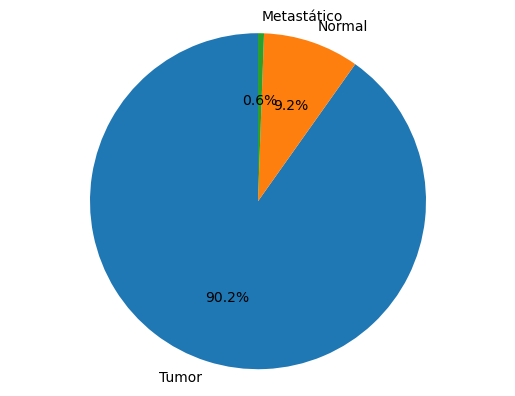

In [73]:
fig3, ax3 = plt.subplots()

labels = 'Tumor', 'Normal', 'Metastático'
sizes = [df_tcga_brca['SampleType'].value_counts().get('Primary Tumor', 0), 
         df_tcga_brca['SampleType'].value_counts().get('Solid Tissue Normal', 0),
        df_tcga_brca['SampleType'].value_counts().get('Metastatic', 0)]


print("{} Tumor\n{} Normal\n{} Metastatic".format(*sizes))

ax3.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax3.axis("equal")
plt.show()

480 LumA
197 LumB
157 Basal
74 Her2
27 Normal
287 NaN


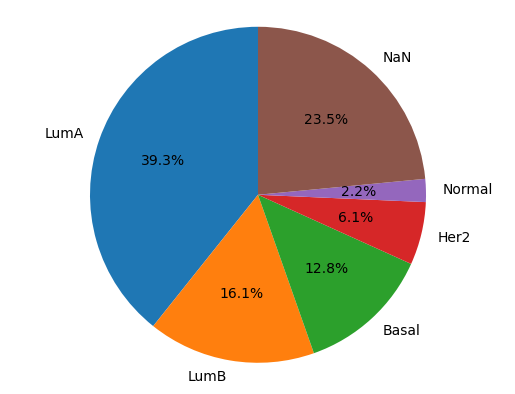

In [74]:
fig4, ax4 = plt.subplots()

labels = 'LumA', 'LumB', 'Basal', 'Her2', 'Normal', 'NaN'
sizes = [df_tcga_brca['Type_PAM50'].value_counts().get('LumA', 0), 
         df_tcga_brca['Type_PAM50'].value_counts().get('LumB', 0),
        df_tcga_brca['Type_PAM50'].value_counts().get('Basal', 0),
        df_tcga_brca['Type_PAM50'].value_counts().get('Her2', 0),
        df_tcga_brca['Type_PAM50'].value_counts().get('Normal', 0),
        df_tcga_brca['Type_PAM50'].isna().sum()]


print("{} LumA\n{} LumB\n{} Basal\n{} Her2\n{} Normal\n{} NaN".format(*sizes))

ax4.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax4.axis("equal")
plt.show()

In [16]:
df_tcga_brca.to_csv('TCGA-BRCA.csv', index=False)
df_tcga_brca2 = pd.read_csv('TCGA-BRCA.csv', low_memory=False)
df_tcga_brca2.head()

,Sample,Type_PAM50,SampleType,TumorPurity,Proliferation_score,Apoptosis_score,Cell_Cycle_score,DNA_damage_response_score,EMT_score,Hormone_a_score,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,TCGA-A8-A09T-01A-11R-A00Z-07,LumA,Primary Tumor,0.63,-0.388631,NaN,NaN,NaN,NaN,NaN,...,0.0,0.216134,0.0,0.000000,0.000000,15.036856,0.088329,0.0,0.117793,0.0
1,TCGA-A8-A097-01A-11R-A034-07,LumA,Primary Tumor,0.53,-0.354341,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.0,0.216106,0.000000,20.767375,0.125121,0.0,0.548877,0.0
2,TCGA-EW-A3E8-01B-11R-A24H-07,LumA,Primary Tumor,NaN,-0.674932,NaN,NaN,NaN,NaN,NaN,...,0.0,0.068599,0.0,0.651667,0.134923,16.495290,0.135034,0.0,1.011621,0.0
3,TCGA-BH-A18H-01A-11R-A12D-07,LumA,Primary Tumor,0.31,-0.531030,1.112469,-2.171855,0.809790,2.304895,2.409912,...,0.0,0.085119,0.0,0.496188,0.000000,44.737327,0.134401,0.0,1.917813,0.0
4,TCGA-A8-A091-01A-11R-A00Z-07,LumA,Primary Tumor,0.75,-0.473854,-1.769383,-2.358583,-0.427877,-0.076001,3.116972,...,0.0,0.013864,0.0,0.098774,0.051126,12.555617,0.607999,0.0,0.272948,0.0


In [17]:
df_tcga_brca2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Columns: 60500 entries, Sample to ENSG00000181518.3
dtypes: float64(60496), object(4)
memory usage: 564.0+ MB


### Informações do banco do TCGA-BRCA:
* Foi encontrado como .txt muito mal formatado
* Foi feito uma limpeza no banco e uma reorganização do dataframe com pandas
* 60500 features e 1222 amostras
* Possui algumas amostragens vazias que devem ser tratadas

In [18]:
gse = GEOparse.get_GEO(geo="GSE70951", destdir="./")
print("GSM example:")
for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print ("Table data:",)
    print (gsm.table.head())
    break

30-Jul-2023 16:28:58 DEBUG utils - Directory ./ already exists. Skipping.
30-Jul-2023 16:28:58 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70951/soft/GSE70951_family.soft.gz to ./GSE70951_family.soft.gz
100%|██████████| 116M/116M [00:59<00:00, 2.03MB/s]   
30-Jul-2023 16:29:59 DEBUG downloader - Size validation passed
30-Jul-2023 16:29:59 DEBUG downloader - Moving C:\Users\leona\AppData\Local\Temp\tmpmhbsyhrh to C:\Users\leona\Área de Trabalho\IC\GSE70951_family.soft.gz
30-Jul-2023 16:29:59 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70951/soft/GSE70951_family.soft.gz
30-Jul-2023 16:29:59 INFO GEOparse - Parsing ./GSE70951_family.soft.gz: 
30-Jul-2023 16:29:59 DEBUG GEOparse - DATABASE: GeoMiame
30-Jul-2023 16:29:59 DEBUG GEOparse - SERIES: GSE70951
30-Jul-2023 16:29:59 DEBUG GEOparse - PLATFORM: GPL4133
30-Jul-2023 16:30:00 WARNING GEOTypes - Detected duplicated columns in d GPL4133. Correcting.

30-Jul

30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821638
30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821639
30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821640
30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821641
30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821642
30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821643
30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821644
30-Jul-2023 16:30:08 DEBUG GEOparse - SAMPLE: GSM1821645
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1821646
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1821647
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1821648
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1823702
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1823703
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1823704
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1823705
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1823706
30-Jul-2023 16:30:09 DEBUG GEOparse - SAMPLE: GSM1823707
30-Jul-2023 16:30:09 DEBUG GEOp

30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823835
30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823836
30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823837
30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823838
30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823839
30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823840
30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823841
30-Jul-2023 16:30:20 DEBUG GEOparse - SAMPLE: GSM1823842
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823843
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823844
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823845
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823846
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823847
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823848
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823849
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823850
30-Jul-2023 16:30:21 DEBUG GEOparse - SAMPLE: GSM1823851
30-Jul-2023 16:30:21 DEBUG GEOp

30-Jul-2023 16:30:32 DEBUG GEOparse - SAMPLE: GSM1823979
30-Jul-2023 16:30:32 DEBUG GEOparse - SAMPLE: GSM1823980
30-Jul-2023 16:30:32 DEBUG GEOparse - SAMPLE: GSM1823981
30-Jul-2023 16:30:32 DEBUG GEOparse - SAMPLE: GSM1823982
30-Jul-2023 16:30:32 DEBUG GEOparse - SAMPLE: GSM1823983
30-Jul-2023 16:30:32 DEBUG GEOparse - SAMPLE: GSM1823984
30-Jul-2023 16:30:32 DEBUG GEOparse - SAMPLE: GSM1823985
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823986
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823987
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823988
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823989
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823990
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823991
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823992
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823993
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823994
30-Jul-2023 16:30:33 DEBUG GEOparse - SAMPLE: GSM1823995
30-Jul-2023 16:30:33 DEBUG GEOp

GSM example:
Name:  GSM1821512
Metadata:
 - title : CM001-normal
 - geo_accession : GSM1821512
 - status : Public on Jul 01 2016
 - submission_date : Jul 14 2015
 - last_update_date : Jul 01 2016
 - type : RNA
 - channel_count : 1
 - source_name_ch1 : breast tissue adjacent to tumor
 - organism_ch1 : Homo sapiens
 - taxid_ch1 : 9606
 - characteristics_ch1 : sample id: CM1N, tissue: normal, er: pos, her2: neg, cohort: cohort_1, age_in_years: 62, bmi: 29.4, tumor_size_cm: 6.5, array_scan_date: 2008-09-23
 - molecule_ch1 : total RNA
 - extract_protocol_ch1 : Tissue samples were stabilized with RNAlater at the time of surgery. After surgery, RNAlater was removed and tissue was stored at -80Â°C. RNA was extracted with TRIzol (Invitrogen, Carlsbad CA) or TRI reagent (Life Technologies, Gaithersburg MD) and further purified on RNeasy columns in combination with the RNeasy Mini Kit (Qiagen, Valenca, CA). RNA was quantified using a NanoDrop ND-1000 spectrophotometer (Thermo Scientific, Wilmingt

In [19]:
def GEO_to_CSV(geo_code, csv):
    path = 'gse_arquivos'
    df = pd.DataFrame()
    try:
        os.makedirs(path)
        print(f"Diretório '{path}' criado com sucesso.")
    except FileExistsError:
        print(f"Diretório '{path}' já existe.")
    try:
        gse = GEOparse.get_GEO(geo=geo_code, destdir=path)
        print(f"[{geo_code}] Repositório baixado para pasta {path}")
    except Exception as e:
        print(f"[{geo_code}] Problema ao baixar repositório: {e}")
    
    print(f"[{geo_code}] Processando importação de amostras...")
    try:
        for gsm_name, gsm in gse.gsms.items():
        
            # Rearranjo dataframe
            gsm.table = gsm.table.T

            # Removendo coluna irrelevante
            gsm.table.drop('ID_REF', axis=0, inplace=True)

            # Inserindo nome dos samples
            gsm.table.insert(0,"sample",[gsm_name],True)

            '''
            O laço for abaixo deve ser customizado para cada repositório, pois cada um tem um modelo de features
            e captura de dados diferente, depende da sua necessidade.
            '''
            # Inserindo o tipo do sample: normal ou breast_adenocarcinoma
            for item in gsm.metadata.get('characteristics_ch1'):
                if "tissue" in item:
                    tissue_type = item.split(":")[1].strip()
                    gsm.table.insert(1,"type",[tissue_type],True)
        
            df = pd.concat([df, gsm.table], axis=0)
    except Exception as e:
        print(f"[{geo_code}] Problema ao importar amostra '{gsm_name}': {e}")
        
    # Resetando os index de linha do dataframe
    df = df.reset_index(drop=True)
    
    if(csv):
        try:
            df.to_csv(geo_code+'.csv', index=False)
            print(f"[{geo_code}] Repositório convertido para csv: '{geo_code}.csv'")
        except Exception as e:
            print(f"[{geo_code}] Problema ao converter para csv: {e}")
    print(f"[{geo_code}] Dataset importa com sucesso!")
    return df

In [20]:
df_gse70951 = GEO_to_CSV('GSE70951', True) # O valor True é para definir que será feita a conversão para .csv

30-Jul-2023 16:30:34 DEBUG utils - Directory gse_arquivos already exists. Skipping.
30-Jul-2023 16:30:34 INFO GEOparse - File already exist: using local version.
30-Jul-2023 16:30:34 INFO GEOparse - Parsing gse_arquivos\GSE70951_family.soft.gz: 
30-Jul-2023 16:30:34 DEBUG GEOparse - DATABASE: GeoMiame
30-Jul-2023 16:30:34 DEBUG GEOparse - SERIES: GSE70951
30-Jul-2023 16:30:34 DEBUG GEOparse - PLATFORM: GPL4133


Diretório 'gse_arquivos' já existe.


30-Jul-2023 16:30:34 WARNING GEOTypes - Detected duplicated columns in d GPL4133. Correcting.

30-Jul-2023 16:30:34 DEBUG GEOparse - PLATFORM: GPL13607
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821512
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821513
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821514
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821515
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821516
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821517
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821518
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821519
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821520
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821521
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821522
30-Jul-2023 16:30:35 DEBUG GEOparse - SAMPLE: GSM1821523
30-Jul-2023 16:30:36 DEBUG GEOparse - SAMPLE: GSM1821524
30-Jul-2023 16:30:36 DEBUG GEOparse - SAMPLE: GSM1821525
30-Jul-2023 16:30:36 DEBUG GEOparse - SAMPLE: GSM1

30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823707
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823708
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823709
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823710
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823711
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823712
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823713
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823714
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823715
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823716
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823717
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823718
30-Jul-2023 16:30:44 DEBUG GEOparse - SAMPLE: GSM1823719
30-Jul-2023 16:30:45 DEBUG GEOparse - SAMPLE: GSM1823720
30-Jul-2023 16:30:45 DEBUG GEOparse - SAMPLE: GSM1823721
30-Jul-2023 16:30:45 DEBUG GEOparse - SAMPLE: GSM1823722
30-Jul-2023 16:30:45 DEBUG GEOparse - SAMPLE: GSM1823723
30-Jul-2023 16:30:45 DEBUG GEOp

30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823851
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823852
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823853
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823854
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823855
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823856
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823857
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823858
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823859
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823860
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823861
30-Jul-2023 16:30:56 DEBUG GEOparse - SAMPLE: GSM1823862
30-Jul-2023 16:30:57 DEBUG GEOparse - SAMPLE: GSM1823863
30-Jul-2023 16:30:57 DEBUG GEOparse - SAMPLE: GSM1823864
30-Jul-2023 16:30:57 DEBUG GEOparse - SAMPLE: GSM1823865
30-Jul-2023 16:30:57 DEBUG GEOparse - SAMPLE: GSM1823866
30-Jul-2023 16:30:57 DEBUG GEOparse - SAMPLE: GSM1823867
30-Jul-2023 16:30:57 DEBUG GEOp

30-Jul-2023 16:31:08 DEBUG GEOparse - SAMPLE: GSM1823995
30-Jul-2023 16:31:08 DEBUG GEOparse - SAMPLE: GSM1823996
30-Jul-2023 16:31:08 DEBUG GEOparse - SAMPLE: GSM1823997


[GSE70951] Repositório baixado para pasta gse_arquivos
[GSE70951] Processando importação de amostras...
[GSE70951] Repositório convertido para csv: 'GSE70951.csv'
[GSE70951] Dataset importa com sucesso!


In [21]:
df_gse70951.head()

,sample,type,0,1,2,3,4,5,6,7,...,62966,62967,62968,62969,62970,62971,62972,62973,62974,62975
0,GSM1821512,normal,16.274,NaN,6.745,6.553,6.661,6.631,6.611,6.677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GSM1821513,normal,NaN,6.683,6.677,6.792,6.676,6.715,6.708,6.783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GSM1821514,normal,NaN,6.491,6.797,6.705,6.546,6.805,6.708,6.748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GSM1821515,normal,15.772,6.834,6.707,6.665,6.581,6.632,6.704,6.672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GSM1821516,normal,18.096,6.486,6.612,6.559,6.454,6.557,6.473,6.436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_gse70951['type'].unique()

array(['normal', 'tumor', 'reduction'], dtype=object)

195 normal
195 tumor
43 reduction


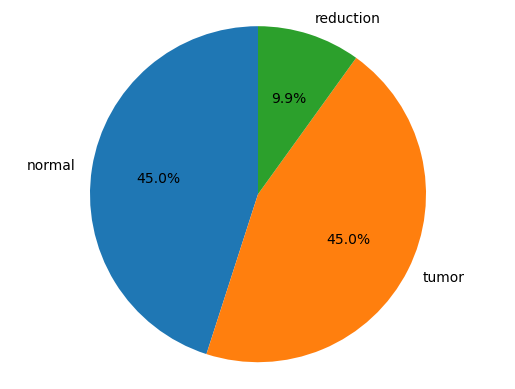

In [77]:
fig5, ax5 = plt.subplots()

labels = 'normal', 'tumor', 'reduction'
sizes = [df_gse70951['type'].value_counts().get('normal', 0), 
         df_gse70951['type'].value_counts().get('tumor', 0),
        df_gse70951['type'].value_counts().get('reduction', 0)]


print("{} normal\n{} tumor\n{} reduction".format(*sizes))

ax5.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax5.axis("equal")
plt.show()

In [22]:
df_gse70951.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Columns: 62978 entries, sample to 62975
dtypes: float64(62976), object(2)
memory usage: 208.0+ MB


### Informações do banco do GEO (GSE70951):
* Se trata de um "Super Serie" baseado no GSE do Cumida (GSE70947) e outro GSE (GSE70905)
* Por se tratar de uma "Super Serie", inclui 3 tipos de rótulos e não apenas 2 como o do Cumida (total de 433 amostras)
* Os rótulos desse dataset são: Normal, Tumor e Reduction -> reduction é referente a casos de reduções mamárias
* Por ser um dataset maior, acontece de muitas features estarem vazias, por consequência muitas features deverão sofrer drop dependendo da sua necessidade no projeto

In [23]:
def GEO_to_CSV(geo_code, csv):
    path = 'gse_arquivos'
    df = pd.DataFrame()
    try:
        os.makedirs(path)
        print(f"Diretório '{path}' criado com sucesso.")
    except FileExistsError:
        print(f"Diretório '{path}' já existe.")
    try:
        gse = GEOparse.get_GEO(geo=geo_code, destdir=path)
        print(f"[{geo_code}] Repositório baixado para pasta {path}")
    except Exception as e:
        print(f"[{geo_code}] Problema ao baixar repositório: {e}")
    
    print(f"[{geo_code}] Processando importação de amostras...")
    try:
        for gsm_name, gsm in gse.gsms.items():
        
            # Rearranjo dataframe
            gsm.table = gsm.table.T

            # Removendo coluna irrelevante
            gsm.table.drop('ID_REF', axis=0, inplace=True)

            # Inserindo nome dos samples
            gsm.table.insert(0,"sample",[gsm_name],True)

            '''
            O laço for abaixo deve ser customizado para cada repositório, pois cada um tem um modelo de features
            e captura de dados diferente, depende da sua necessidade.
            '''
            # Inserindo o tipo do sample: normal ou breast_adenocarcinoma
            for item in gsm.metadata.get('characteristics_ch1'):
                if "tissue" in item:
                    tissue_type = item.split(":")[1].strip()
                    if tissue_type == "breast tumor-adjacent normal":
                        tissue_type = "normal"
                    if tissue_type == "breast tumor":
                        tissue_type = "tumor"
                    gsm.table.insert(1,"type",[tissue_type],True)
        
            df = pd.concat([df, gsm.table], axis=0)
    except Exception as e:
        print(f"[{geo_code}] Problema ao importar amostra '{gsm_name}': {e}")
        
    # Resetando os index de linha do dataframe
    df = df.reset_index(drop=True)
    
    if(csv):
        try:
            df.to_csv(geo_code+'.csv', index=False)
            print(f"[{geo_code}] Repositório convertido para csv: '{geo_code}.csv'")
        except Exception as e:
            print(f"[{geo_code}] Problema ao converter para csv: {e}")
    print(f"[{geo_code}] Dataset importa com sucesso!")
    return df

In [24]:
df_gse93601 = GEO_to_CSV('GSE93601', True) # O valor True é para definir que será feita a conversão para .csv

30-Jul-2023 16:32:23 DEBUG utils - Directory gse_arquivos already exists. Skipping.
30-Jul-2023 16:32:23 INFO GEOparse - File already exist: using local version.
30-Jul-2023 16:32:23 INFO GEOparse - Parsing gse_arquivos\GSE93601_family.soft.gz: 
30-Jul-2023 16:32:23 DEBUG GEOparse - DATABASE: GeoMiame
30-Jul-2023 16:32:23 DEBUG GEOparse - SERIES: GSE93601
30-Jul-2023 16:32:23 DEBUG GEOparse - PLATFORM: GPL22920


Diretório 'gse_arquivos' já existe.


30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457340
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457341
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457342
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457343
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457344
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457345
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457346
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457347
30-Jul-2023 16:32:23 DEBUG GEOparse - SAMPLE: GSM2457348
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457349
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457350
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457351
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457352
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457353
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457354
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457355
30-Jul-2023 16:32:24 DEBUG GEOparse - SAMPLE: GSM2457356
30-Jul-2023 16:32:24 DEBUG GEOp

30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457484
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457485
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457486
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457487
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457488
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457489
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457490
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457491
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457492
30-Jul-2023 16:32:30 DEBUG GEOparse - SAMPLE: GSM2457493
30-Jul-2023 16:32:31 DEBUG GEOparse - SAMPLE: GSM2457494
30-Jul-2023 16:32:31 DEBUG GEOparse - SAMPLE: GSM2457495
30-Jul-2023 16:32:31 DEBUG GEOparse - SAMPLE: GSM2457496
30-Jul-2023 16:32:31 DEBUG GEOparse - SAMPLE: GSM2457497
30-Jul-2023 16:32:31 DEBUG GEOparse - SAMPLE: GSM2457498
30-Jul-2023 16:32:31 DEBUG GEOparse - SAMPLE: GSM2457499
30-Jul-2023 16:32:31 DEBUG GEOparse - SAMPLE: GSM2457500
30-Jul-2023 16:32:31 DEBUG GEOp

30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457628
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457629
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457630
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457631
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457632
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457633
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457634
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457635
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457636
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457637
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457638
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457639
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457640
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457641
30-Jul-2023 16:32:37 DEBUG GEOparse - SAMPLE: GSM2457642
30-Jul-2023 16:32:38 DEBUG GEOparse - SAMPLE: GSM2457643
30-Jul-2023 16:32:38 DEBUG GEOparse - SAMPLE: GSM2457644
30-Jul-2023 16:32:38 DEBUG GEOp

30-Jul-2023 16:32:43 DEBUG GEOparse - SAMPLE: GSM2457772
30-Jul-2023 16:32:43 DEBUG GEOparse - SAMPLE: GSM2457773
30-Jul-2023 16:32:43 DEBUG GEOparse - SAMPLE: GSM2457774
30-Jul-2023 16:32:43 DEBUG GEOparse - SAMPLE: GSM2457775
30-Jul-2023 16:32:43 DEBUG GEOparse - SAMPLE: GSM2457776
30-Jul-2023 16:32:43 DEBUG GEOparse - SAMPLE: GSM2457777
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457778
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457779
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457780
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457781
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457782
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457783
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457784
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457785
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457786
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457787
30-Jul-2023 16:32:44 DEBUG GEOparse - SAMPLE: GSM2457788
30-Jul-2023 16:32:44 DEBUG GEOp

30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457916
30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457917
30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457918
30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457919
30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457920
30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457921
30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457922
30-Jul-2023 16:32:50 DEBUG GEOparse - SAMPLE: GSM2457923
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457924
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457925
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457926
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457927
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457928
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457929
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457930
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457931
30-Jul-2023 16:32:51 DEBUG GEOparse - SAMPLE: GSM2457932
30-Jul-2023 16:32:51 DEBUG GEOp

30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458060
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458061
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458062
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458063
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458064
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458065
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458067
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458069
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458070
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458072
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458074
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458076
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458078
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458079
30-Jul-2023 16:32:57 DEBUG GEOparse - SAMPLE: GSM2458081
30-Jul-2023 16:32:58 DEBUG GEOparse - SAMPLE: GSM2458083
30-Jul-2023 16:32:58 DEBUG GEOparse - SAMPLE: GSM2458084
30-Jul-2023 16:32:58 DEBUG GEOp

30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458249
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458250
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458251
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458252
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458253
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458254
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458255
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458256
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458257
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458258
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458259
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458260
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458261
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458262
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458263
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458264
30-Jul-2023 16:33:04 DEBUG GEOparse - SAMPLE: GSM2458265
30-Jul-2023 16:33:04 DEBUG GEOp

30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458393
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458394
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458395
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458396
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458397
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458398
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458399
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458400
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458401
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458402
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458403
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458404
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458405
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458406
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458407
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458408
30-Jul-2023 16:33:11 DEBUG GEOparse - SAMPLE: GSM2458409
30-Jul-2023 16:33:11 DEBUG GEOp

[GSE93601] Repositório baixado para pasta gse_arquivos
[GSE93601] Processando importação de amostras...
[GSE93601] Repositório convertido para csv: 'GSE93601.csv'
[GSE93601] Dataset importa com sucesso!


In [25]:
df_gse93601.head()

,sample,type,0,1,2,3,4,5,6,7,...,25969,25970,25971,25972,25973,25974,25975,25976,25977,25978
0,GSM2457340,normal,3.17257,3.96833,6.32134,3.1836,1.47211,5.46168,6.14513,7.7607,...,3.13562,1.66749,2.17865,3.86739,3.12423,3.09973,4.26032,2.24583,3.00157,3.87643
1,GSM2457341,tumor,3.54919,1.38761,6.16843,2.3405,2.00835,6.10476,2.77169,6.40516,...,2.65184,2.69314,1.64442,3.37795,3.40604,2.98287,3.52327,2.25829,2.44603,3.55933
2,GSM2457342,tumor,4.04113,4.4183,4.71608,2.1093,2.65321,3.92873,5.88745,4.48246,...,3.73408,3.34071,2.51357,3.65563,2.85774,3.75635,2.65328,1.51054,1.73573,3.11893
3,GSM2457343,normal,3.77238,5.75452,5.50425,4.15625,3.20514,6.45118,4.88422,6.80894,...,2.92967,3.58213,2.01395,4.0545,2.54193,3.5299,2.7054,2.9426,2.65071,3.21281
4,GSM2457344,tumor,3.70205,4.69698,6.41453,2.49349,2.22006,5.78872,6.40298,8.34644,...,3.51054,3.10071,1.61291,3.8227,3.61806,4.0468,4.48742,2.30349,1.82405,3.24881


In [78]:
df_gse93601['type'].unique()

array(['normal', 'tumor'], dtype=object)

508 normal
602 tumor


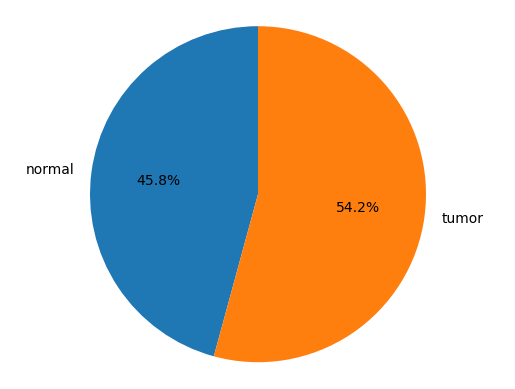

In [79]:
fig6, ax6 = plt.subplots()

labels = 'normal', 'tumor'
sizes = [df_gse93601['type'].value_counts().get('normal', 0), 
         df_gse93601['type'].value_counts().get('tumor', 0)]


print("{} normal\n{} tumor".format(*sizes))

ax6.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax6.axis("equal")
plt.show()

In [26]:
df_gse93601.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Columns: 25981 entries, sample to 25978
dtypes: object(25981)
memory usage: 220.0+ MB


### Informações do banco do GEO (GSE93601): (602 tumor and 508 normal)
* Esse dataset foi utilizado para um estudo que analisa a influência da expressão de gene e consumo diário de álcool
* Para formular o csv, não foi incluído os dados do consumo de álcool
* A função GEO_to_CSV() para ele foi adaptada para estar nos padrões do Cumida 